In [2]:
#basic import 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('dark')
from sklearn.metrics import classification_report,accuracy_score,f1_score,roc_auc_score

In [3]:
train_df = pd.read_csv('/Users/aadityajoshi/Downloads/archive-17/train.csv',index_col=0)
test_df = pd.read_csv('/Users/aadityajoshi/Downloads/archive-17/test.csv',index_col=0)

In [4]:
train_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
test_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


In [9]:
train_df.drop_duplicates(inplace=True)

In [10]:
train_df['Arrival Delay in Minutes'].fillna(np.mean(train_df['Arrival Delay in Minutes']),inplace=True)
test_df['Arrival Delay in Minutes'].fillna(np.mean(test_df['Arrival Delay in Minutes']),inplace=True)

In [11]:
train_df.drop('id',axis=1,inplace=True)
test_df.drop('id',axis=1,inplace=True)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    103904 no

In [13]:
cat_cols = ['Gender', 'Customer Type','Type of Travel', 'Class','Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness','Overall']
num_cols = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']
target_col = ['satisfaction']

In [14]:
def plot_box(df):
    numerical_cols = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']
    num_plots = len(numerical_cols)
    nrows = (num_plots+1)//2
    ncols = 2
    fig, axes = plt.subplots(figsize=(8,10),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(numerical_cols):
        row = i//2
        col = i%2
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.boxplot(x='satisfaction',y=column,data=df,palette='rocket', linewidth=1.5, saturation=0.9,ax=ax,width=0.55)
        ax.set_title(f'Boxplot of {column}', color='white', fontsize=7, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=8)
        ax.set_ylabel('Values', color='white', fontsize=8)
        
        ax.tick_params(axis='x', colors='white', labelsize=6)
        ax.tick_params(axis='y', colors='white', labelsize=6)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

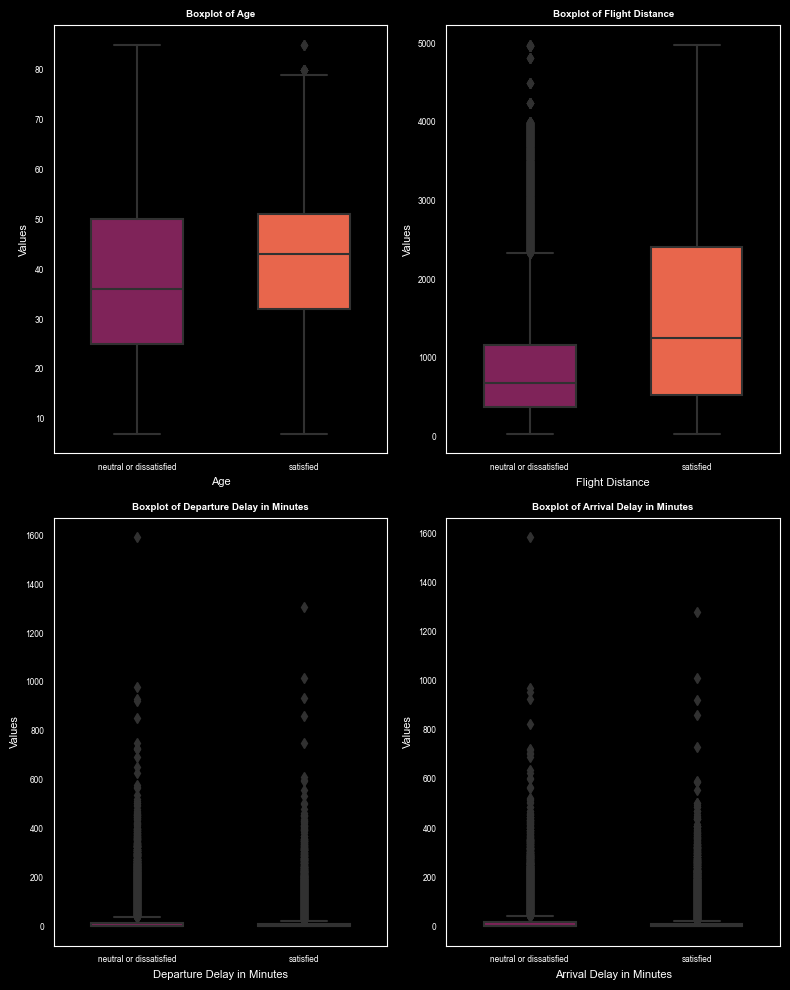

In [15]:
%matplotlib inline
plot_box(train_df)

In [16]:
def plot_hist(df):
    numerical_cols = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']
    num_plots = len(numerical_cols)
    nrows = (num_plots+1)//2
    ncols = 2
    fig, axes = plt.subplots(figsize=(12,14),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(numerical_cols):
        row = i//2
        col = i%2
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.histplot(x=column,data=df,palette='magma',hue='satisfaction',bins=60,kde=True,ax=ax)
        ax.set_title(f'Histplot of {column}', color='white', fontsize=7, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=8)
        ax.set_ylabel('Values', color='white', fontsize=8)
        
        ax.tick_params(axis='x', colors='white', labelsize=6)
        ax.tick_params(axis='y', colors='white', labelsize=6)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

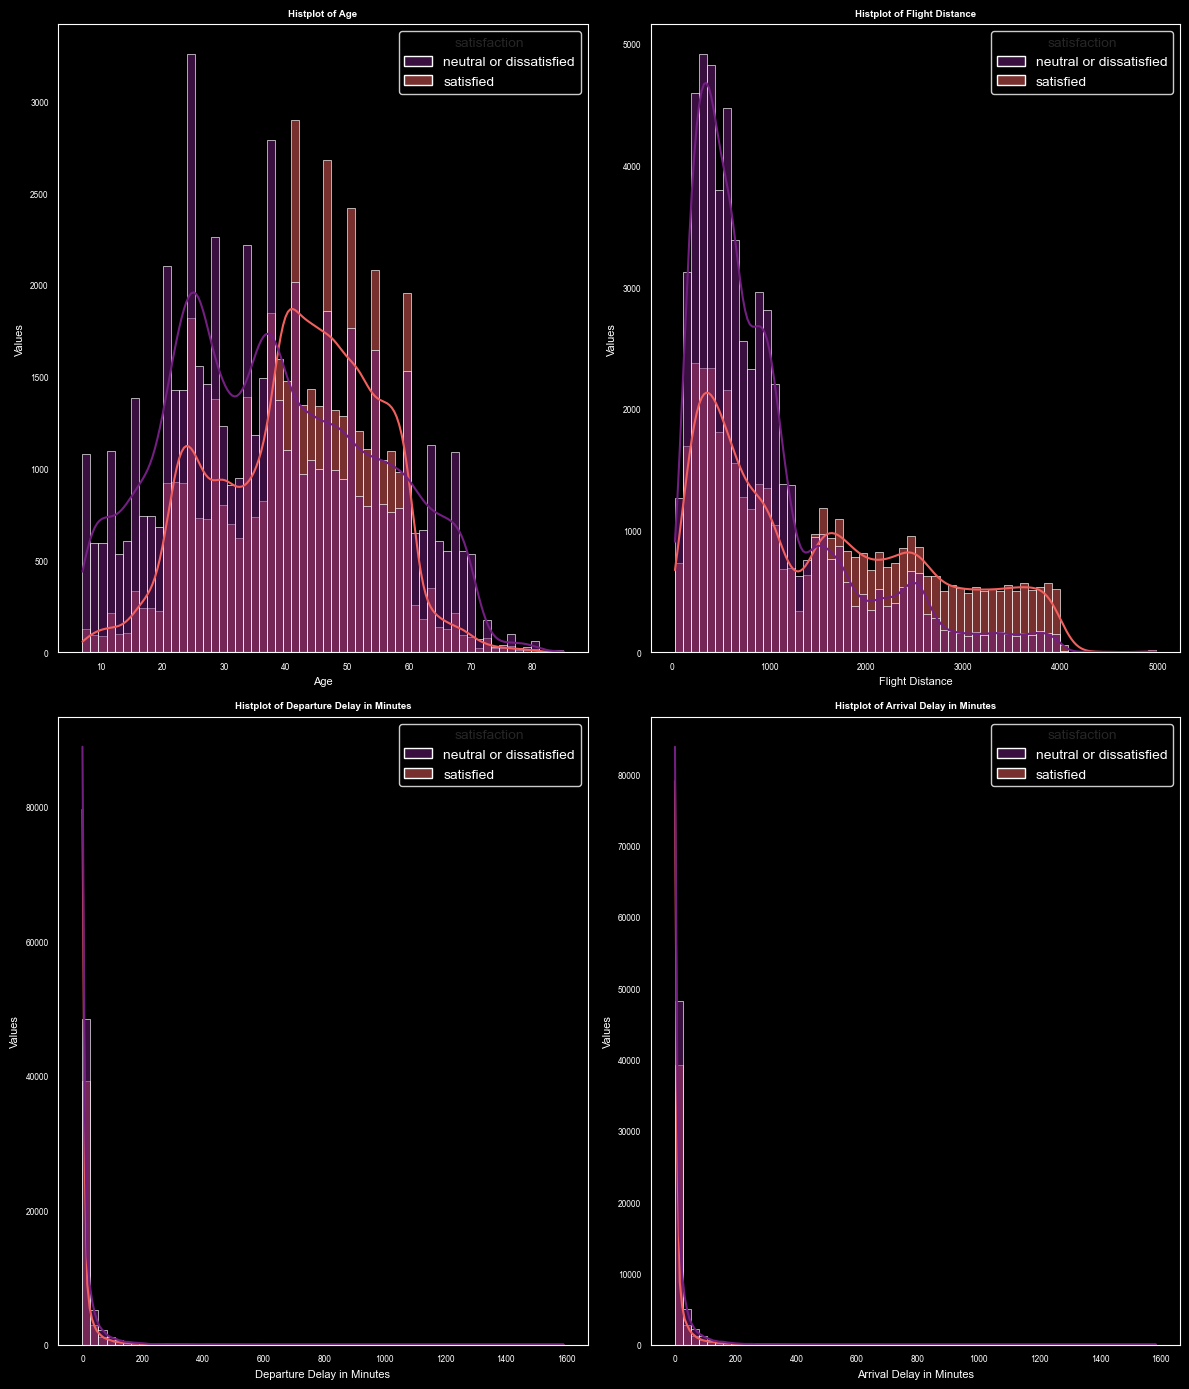

In [17]:
plot_hist(train_df)

In [18]:
def plot_count(df):
    cat_cols = cat_cols = ['Gender', 'Customer Type','Type of Travel', 'Class','Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
    num_plots = len(cat_cols)
    nrows = (num_plots+2)//3
    ncols = 3
    fig, axes = plt.subplots(figsize=(30,40),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(cat_cols):
        row = i//3
        col = i%3
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.countplot(x=column,data=df,palette='Set3',ax=ax,hue='satisfaction',linewidth=1.4)
        ax.set_title(f'Countplot of {column}', color='white', fontsize=14, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=12)
        ax.set_ylabel('Values', color='white', fontsize=12)
        
        ax.tick_params(axis='x', colors='white', labelsize=10)
        ax.tick_params(axis='y', colors='white', labelsize=10)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

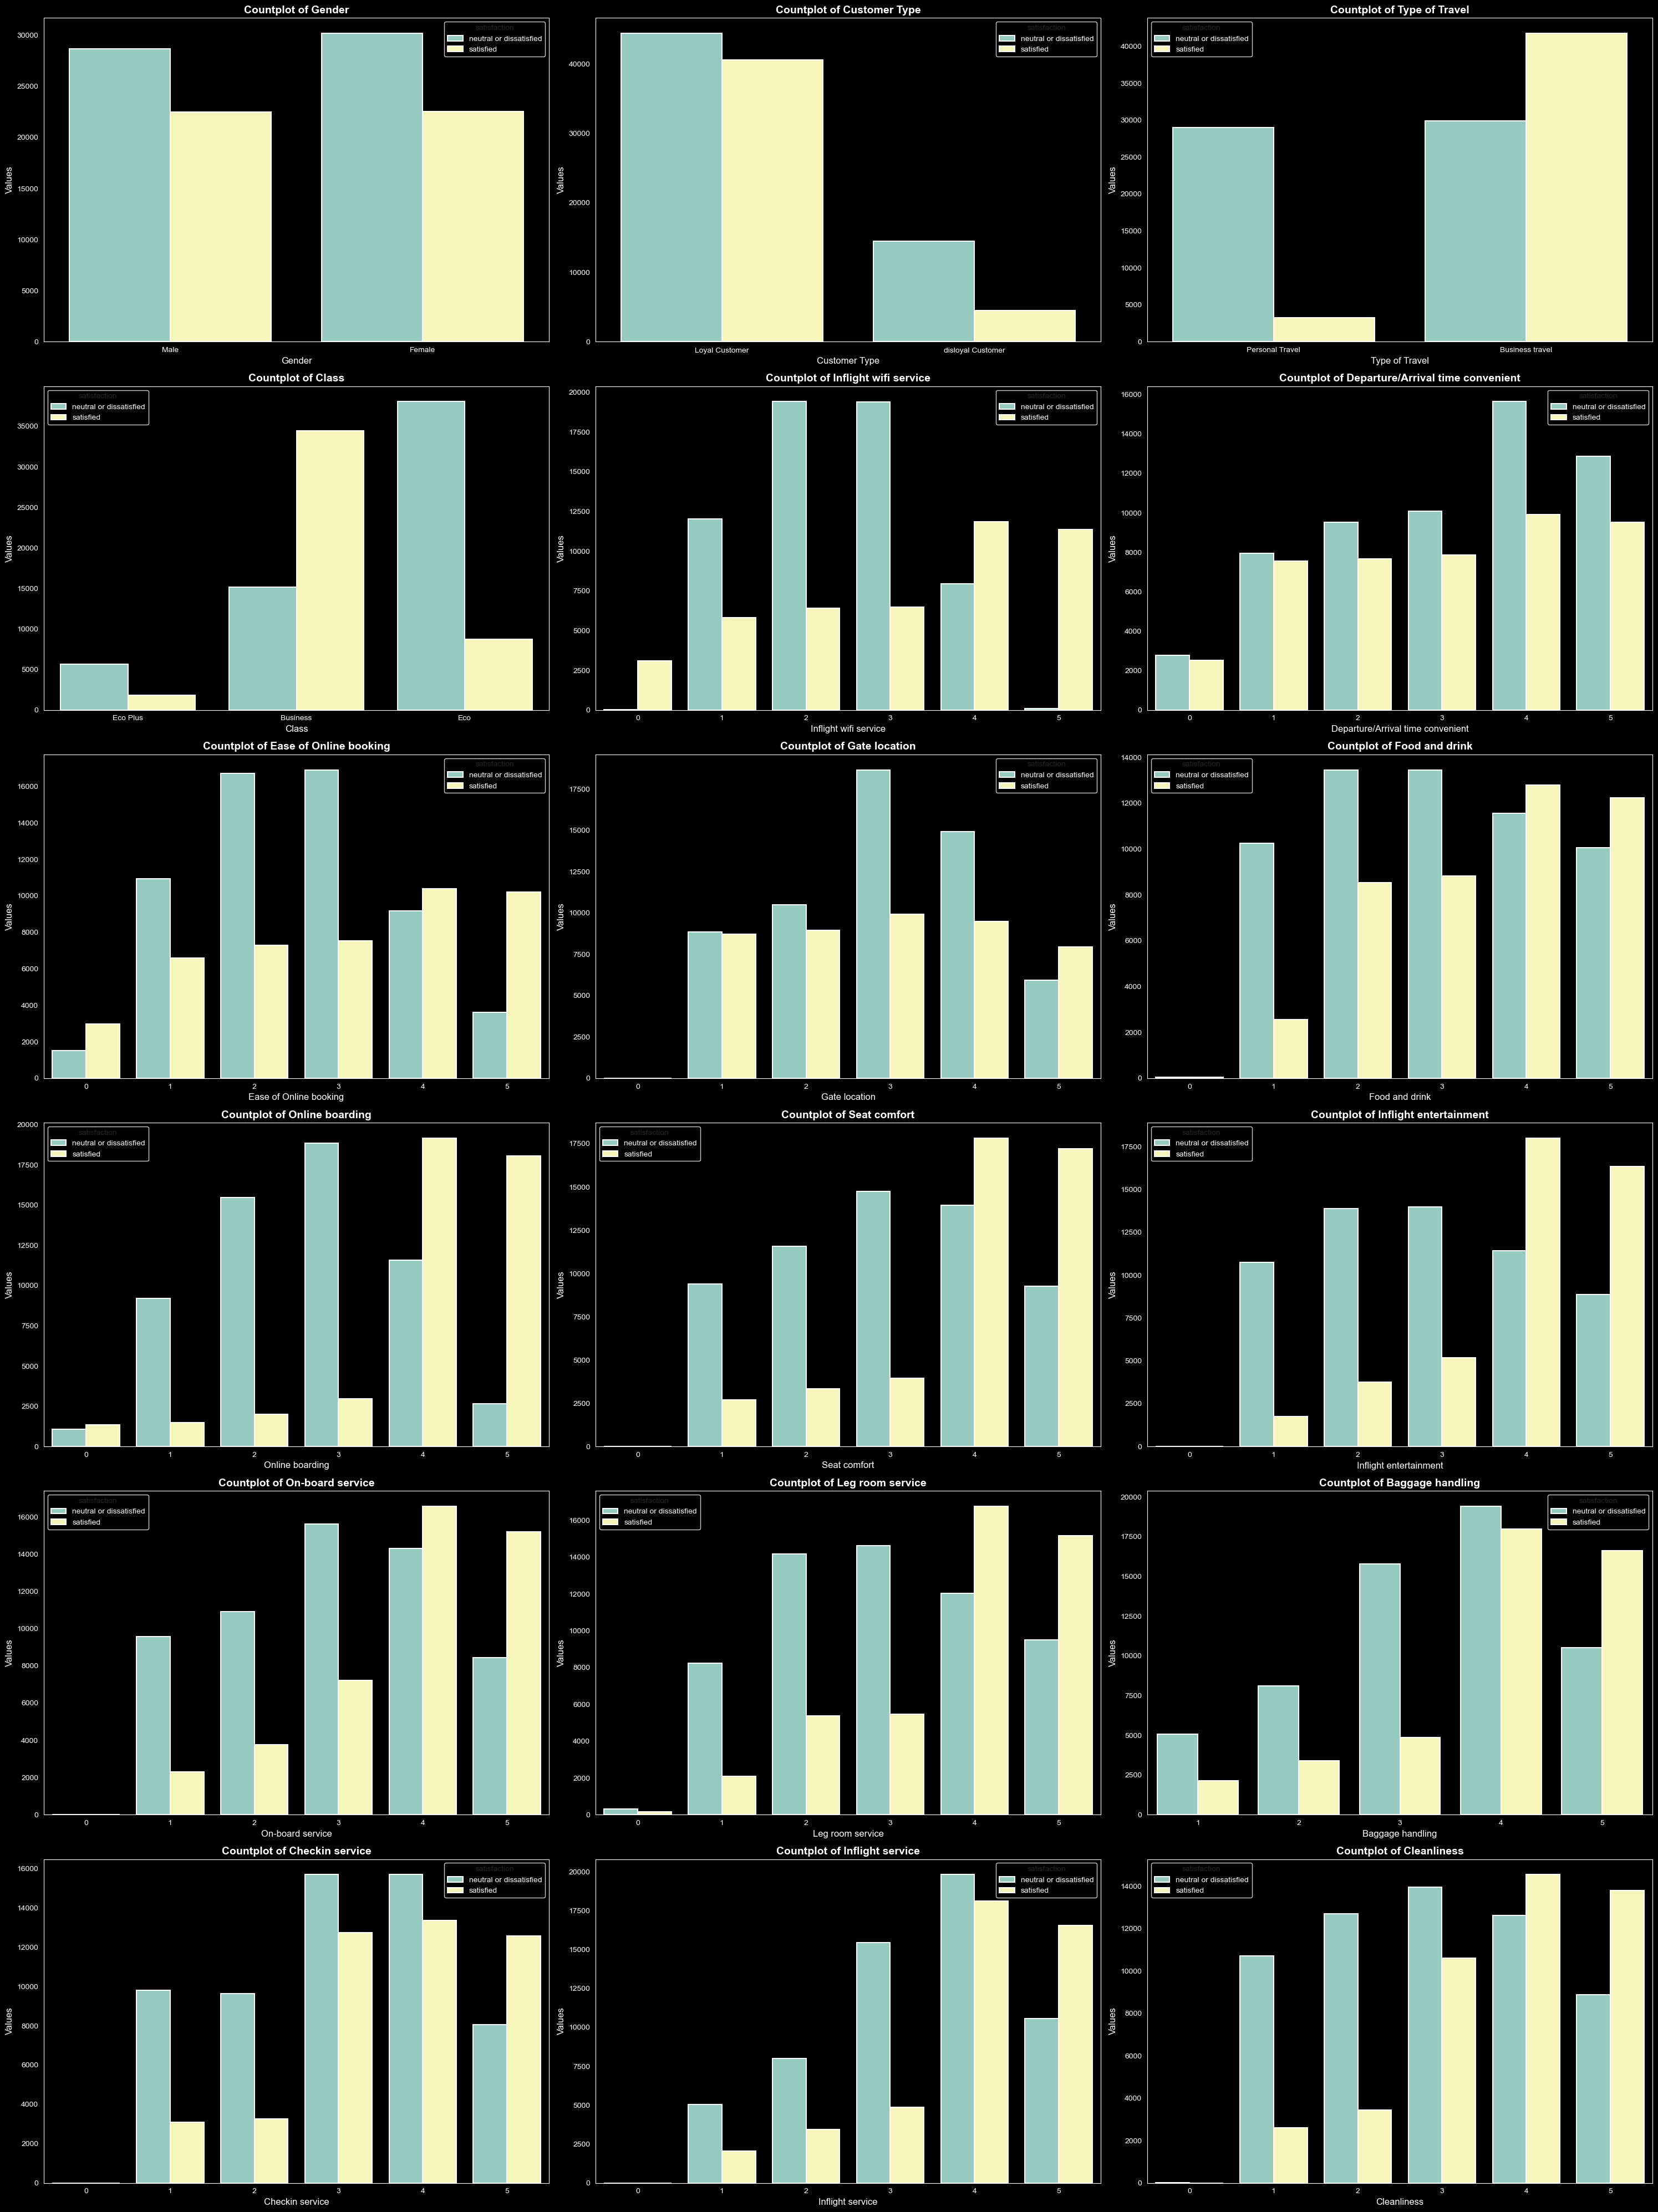

In [19]:
plot_count(train_df)

In [20]:
train_df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [21]:
map_cust = {'Loyal Customer':1,'disloyal Customer':0}
train_df['Customer Type'] = train_df['Customer Type'].replace(map_cust)
test_df['Customer Type'] = test_df['Customer Type'].replace(map_cust)

In [22]:
map_gender = {'Female':1,'Male':0}
train_df['Gender'] = train_df['Gender'].replace(map_gender)
test_df['Gender'] = test_df['Gender'].replace(map_gender)

In [23]:
map_travel = {'Business travel':1,'Personal Travel':0}
train_df['Type of Travel'] = train_df['Type of Travel'].replace(map_travel)
test_df['Type of Travel'] = test_df['Type of Travel'].replace(map_travel)

In [24]:
map_class = {'Business':2,'Eco':0,'Eco Plus':1}
train_df['Class'] = train_df['Class'].replace(map_class)
test_df['Class'] = test_df['Class'].replace(map_class)

In [25]:
map_sat = {'neutral or dissatisfied':0,'satisfied':1}
train_df['satisfaction'] = train_df['satisfaction'].replace(map_sat)
test_df['satisfaction'] = test_df['satisfaction'].replace(map_sat)

In [26]:
int_col = [x for x in list(train_df.columns) if x != 'Arrival Delay in Minutes' and x!='Overall']
for col in int_col:
    train_df[col] = train_df[col].astype('int16')
    test_df[col] = test_df[col].astype('int16')

In [27]:
train_df['Arrival Delay in Minutes'] = train_df['Arrival Delay in Minutes'].astype('float16')
test_df['Arrival Delay in Minutes'] = train_df['Arrival Delay in Minutes'].astype('float16')

In [28]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

### Splitting data

In [29]:
X_train = train_df.drop('satisfaction',axis=1)
X_test = test_df.drop('satisfaction',axis=1)
y_train = train_df['satisfaction']
y_test = test_df['satisfaction']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [196]:
from catboost import CatBoostClassifier
cat_ft = np.where(X_train.dtypes!='float16')[0]

In [207]:
parameters = {
    'iterations': 300,                
    'learning_rate': 0.025,               
    'depth': 10,                         
    'l2_leaf_reg': 3,                   
    'bagging_temperature': 1.0,         # Controls intensity of Bayesian bagging
    'border_count': 254,                # Number of splits for numerical features         # Indices of categorical features in the input data
    'thread_count': 8,                  # Number of parallel threads used for training
    'random_seed': 42,                  # Seed for random number generator for reproducibility
    'loss_function': 'Logloss',         # Loss function to optimize during training
    'eval_metric': 'AUC',               # Metric used for evaluation
    'custom_metric': ['Accuracy', 'AUC'], # Additional metrics to be evaluated during training
    'use_best_model': True,            
    'od_type': 'Iter',                  
    'verbose': True              
}

In [241]:
cat_clf = CatBoostClassifier(**parameters)

In [242]:
cat_clf.fit(
    X_train, y_train,
    cat_features=cat_ft,
    eval_set=(X_val, y_val),
    logging_level='Verbose' ,  # you can uncomment this for text output
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9879481	best: 0.9879481 (0)	total: 89.5ms	remaining: 26.8s
1:	test: 0.9903184	best: 0.9903184 (1)	total: 173ms	remaining: 25.8s
2:	test: 0.9908211	best: 0.9908211 (2)	total: 243ms	remaining: 24.1s
3:	test: 0.9906985	best: 0.9908211 (2)	total: 320ms	remaining: 23.6s
4:	test: 0.9906747	best: 0.9908211 (2)	total: 388ms	remaining: 22.9s
5:	test: 0.9908382	best: 0.9908382 (5)	total: 453ms	remaining: 22.2s
6:	test: 0.9910625	best: 0.9910625 (6)	total: 519ms	remaining: 21.7s
7:	test: 0.9910550	best: 0.9910625 (6)	total: 582ms	remaining: 21.2s
8:	test: 0.9911867	best: 0.9911867 (8)	total: 647ms	remaining: 20.9s
9:	test: 0.9910868	best: 0.9911867 (8)	total: 713ms	remaining: 20.7s
10:	test: 0.9910989	best: 0.9911867 (8)	total: 782ms	remaining: 20.5s
11:	test: 0.9911508	best: 0.9911867 (8)	total: 842ms	remaining: 20.2s
12:	test: 0.9911530	best: 0.9911867 (8)	total: 916ms	remaining: 20.2s
13:	test: 0.9911082	best: 0.9911867 (8)	total: 986ms	remaining: 20.1s
14:	test: 0.9912183	best: 0.9

In [210]:
cat_pred = cat_clf.predict(X_test)
print(classification_report(cat_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     14878
           1       0.94      0.97      0.96     11098

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [1]:
import optuna

In [234]:
def cat_objective(trial, train_x=X_train, test_x=X_val, train_y=y_train, test_y=y_val):
    param = {
        'loss_function': 'Logloss',
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0),
        'max_bin': trial.suggest_int('max_bin', 200, 400),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.01),
        'iterations': trial.suggest_int('iterations', 200, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 13),
        'random_state': 2020,  # Fixed value, no need for suggest_categorical
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 300),
    }

    model = CatBoostClassifier(**param)  
    model.fit(train_x, train_y, eval_set=[(test_x, test_y)], early_stopping_rounds=100, verbose=False)
    preds = model.predict(test_x)
    accuracy = accuracy_score(test_y, preds)
    return accuracy

In [237]:
study_cat = optuna.create_study(direction='maximize', study_name="new_cat_optuna_2")
study_cat.optimize(cat_objective, n_trials=100)
print('Number of finished trials:', len(study_cat.trials))
print('Best trial:', study_cat.best_trial.params)

Number of finished trials: 100
Best trial: {'l2_leaf_reg': 0.47980103833364474, 'max_bin': 242, 'subsample': 0.6851536975489596, 'learning_rate': 0.009852566115283071, 'iterations': 881, 'max_depth': 11, 'min_data_in_leaf': 244}


In [238]:
best_params = {'l2_leaf_reg': 0.47980103833364474, 'max_bin': 242, 'subsample': 0.6851536975489596, 'learning_rate': 0.009852566115283071, 'iterations': 881, 'max_depth': 11, 'min_data_in_leaf': 244}

In [239]:
best_cat_clf = CatBoostClassifier(**best_params)

In [243]:
best_cat_clf.fit(
    X_train, y_train,
    cat_features=cat_ft,
    eval_set=(X_val, y_val),
    logging_level='Verbose' ,  # you can uncomment this for text output
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6652174	test: 0.6651610	best: 0.6651610 (0)	total: 110ms	remaining: 1m 36s
1:	learn: 0.6387720	test: 0.6386047	best: 0.6386047 (1)	total: 203ms	remaining: 1m 29s
2:	learn: 0.6176564	test: 0.6175294	best: 0.6175294 (2)	total: 290ms	remaining: 1m 24s
3:	learn: 0.5960411	test: 0.5959215	best: 0.5959215 (3)	total: 387ms	remaining: 1m 24s
4:	learn: 0.5762760	test: 0.5760756	best: 0.5760756 (4)	total: 473ms	remaining: 1m 22s
5:	learn: 0.5533514	test: 0.5531003	best: 0.5531003 (5)	total: 562ms	remaining: 1m 21s
6:	learn: 0.5368569	test: 0.5364232	best: 0.5364232 (6)	total: 649ms	remaining: 1m 21s
7:	learn: 0.5173342	test: 0.5167536	best: 0.5167536 (7)	total: 744ms	remaining: 1m 21s
8:	learn: 0.5018896	test: 0.5014039	best: 0.5014039 (8)	total: 826ms	remaining: 1m 20s
9:	learn: 0.4907805	test: 0.4903793	best: 0.4903793 (9)	total: 919ms	remaining: 1m 20s
10:	learn: 0.4746892	test: 0.4744529	best: 0.4744529 (10)	total: 1.02s	remaining: 1m 20s
11:	learn: 0.4590106	test: 0.4587341	best

In [244]:
best_cat_pred = best_cat_clf.predict(X_test)
print(classification_report(best_cat_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     14915
           1       0.94      0.97      0.96     11061

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [33]:
from lightgbm import LGBMClassifier
params_lgb = {
    'learning_rate': 0.01,
    'boosting_type': 'gbdt',
    'objective': 'binary',          # Changed objective to binary
    'metric': 'binary_logloss',     # Changed metric to binary_logloss
    'sub_feature': 0.8,             # colsample_bytree
    'num_leaves': 45,
    'min_child_samples': 25,        # min_data_in_leaf
    'n_estimators': 250,
    'max_depth': 50
}
lgbm = LGBMClassifier(**params_lgb)

In [32]:
lgbm.fit(X_train,y_train,
        eval_set=(X_val,y_val))

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
[LightGBM] [Warning] Found whitespace in feature_names, 

LGBMClassifier(learning_rate=0.01, max_depth=50, metric='binary_logloss',
               min_child_samples=25, n_estimators=250, num_leaves=45,
               objective='binary', sub_feature=0.8)

In [34]:
pred_lgbm = lgbm.predict(X_test)
print(classification_report(pred_lgbm,y_test))

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     14873
           1       0.94      0.96      0.95     11103

    accuracy                           0.96     25976
   macro avg       0.95      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [36]:
def lgbm_objective(trial, train_x=X_train, test_x=X_val, train_y=y_train, test_y=y_val):
    param_lg = {
        'loss_function': 'Logloss',
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.01),
        'n_estimators': trial.suggest_int('iterations', 200, 1000),
        'max_depth': trial.suggest_int('max_depth', 20, 150),
        'random_state': 2020,  # Fixed value, no need for suggest_categorical
        "num_leaves": trial.suggest_int("num_leaves", 20, 200, step=20),
        'min_child_samples': trial.suggest_int("min_child_samples", 10, 50, step=5)
    }

    model = LGBMClassifier(**param_lg)  
    model.fit(train_x, train_y, eval_set=[(test_x, test_y)])
    preds = model.predict(test_x)
    accuracy = accuracy_score(test_y, preds)
    return accuracy

In [37]:
study_lg = optuna.create_study(direction='maximize', study_name="LGBM_optuna")
study_lg.optimize(lgbm_objective, n_trials=75)
print('Number of finished trials:', len(study_lg.trials))
print('Best trial:', study_lg.best_trial.params)

[I 2024-10-05 17:17:27,076] A new study created in memory with name: LGBM_optuna


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:17:33,004] Trial 0 finished with value: 0.9551032192868486 and parameters: {'learning_rate': 0.0014070046855302672, 'iterations': 402, 'max_depth': 74, 'num_leaves': 120, 'min_child_samples': 15}. Best is trial 0 with value: 0.9551032192868486.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:17:34,379] Trial 1 finished with value: 0.9286367354795245 and parameters: {'learning_rate': 0.0022678358504065457, 'iterations': 288, 'max_depth': 61, 'num_leaves': 20, 'min_child_samples': 40}. Best is trial 0 with value: 0.9551032192868486.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:17:39,371] Trial 2 finished with value: 0.958952889658823 and parameters: {'learning_rate': 0.0044915576463424355, 'iterations': 336, 'max_depth': 110, 'num_leaves': 120, 'min_child_samples': 30}. Best is trial 2 with value: 0.958952889658823.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:18:01,782] Trial 3 finished with value: 0.9646311534574852 and parameters: {'learning_rate': 0.009605150560042554, 'iterations': 995, 'max_depth': 145, 'num_leaves': 160, 'min_child_samples': 20}. Best is trial 3 with value: 0.9646311534574852.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:18:17,110] Trial 4 finished with value: 0.9643424281795872 and parameters: {'learning_rate': 0.008522066774436551, 'iterations': 927, 'max_depth': 76, 'num_leaves': 140, 'min_child_samples': 35}. Best is trial 3 with value: 0.9646311534574852.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:18:30,191] Trial 5 finished with value: 0.9560656368798421 and parameters: {'learning_rate': 0.001964846270532753, 'iterations': 603, 'max_depth': 70, 'num_leaves': 140, 'min_child_samples': 50}. Best is trial 3 with value: 0.9646311534574852.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:18:53,102] Trial 6 finished with value: 0.9645830325778355 and parameters: {'learning_rate': 0.008722064791582452, 'iterations': 1000, 'max_depth': 126, 'num_leaves': 140, 'min_child_samples': 30}. Best is trial 3 with value: 0.9646311534574852.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:19:05,743] Trial 7 finished with value: 0.9639574611423897 and parameters: {'learning_rate': 0.007476899544912844, 'iterations': 618, 'max_depth': 114, 'num_leaves': 180, 'min_child_samples': 15}. Best is trial 3 with value: 0.9646311534574852.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:19:16,935] Trial 8 finished with value: 0.9620807468360522 and parameters: {'learning_rate': 0.006456810902060619, 'iterations': 412, 'max_depth': 60, 'num_leaves': 180, 'min_child_samples': 45}. Best is trial 3 with value: 0.9646311534574852.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:19:36,063] Trial 9 finished with value: 0.9639574611423897 and parameters: {'learning_rate': 0.007775934848354227, 'iterations': 741, 'max_depth': 132, 'num_leaves': 160, 'min_child_samples': 30}. Best is trial 3 with value: 0.9646311534574852.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:19:44,945] Trial 10 finished with value: 0.964967999615033 and parameters: {'learning_rate': 0.009556852842082677, 'iterations': 791, 'max_depth': 22, 'num_leaves': 60, 'min_child_samples': 10}. Best is trial 10 with value: 0.964967999615033.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:19:54,158] Trial 11 finished with value: 0.9646311534574852 and parameters: {'learning_rate': 0.009860081417025318, 'iterations': 834, 'max_depth': 38, 'num_leaves': 60, 'min_child_samples': 10}. Best is trial 10 with value: 0.964967999615033.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:20:03,212] Trial 12 finished with value: 0.9646311534574852 and parameters: {'learning_rate': 0.009893749255387229, 'iterations': 797, 'max_depth': 23, 'num_leaves': 80, 'min_child_samples': 20}. Best is trial 10 with value: 0.964967999615033.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:20:16,379] Trial 13 finished with value: 0.9633318897069438 and parameters: {'learning_rate': 0.004865390219027753, 'iterations': 925, 'max_depth': 97, 'num_leaves': 80, 'min_child_samples': 20}. Best is trial 10 with value: 0.964967999615033.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:20:19,708] Trial 14 finished with value: 0.954140801693855 and parameters: {'learning_rate': 0.006136231415302357, 'iterations': 713, 'max_depth': 147, 'num_leaves': 20, 'min_child_samples': 10}. Best is trial 10 with value: 0.964967999615033.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:20:41,516] Trial 15 finished with value: 0.9642943072999375 and parameters: {'learning_rate': 0.008777512119707802, 'iterations': 999, 'max_depth': 44, 'num_leaves': 200, 'min_child_samples': 20}. Best is trial 10 with value: 0.964967999615033.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:20:48,597] Trial 16 finished with value: 0.9604927578076127 and parameters: {'learning_rate': 0.0036747714790099258, 'iterations': 863, 'max_depth': 92, 'num_leaves': 60, 'min_child_samples': 25}. Best is trial 10 with value: 0.964967999615033.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:20:57,167] Trial 17 finished with value: 0.9626581973918483 and parameters: {'learning_rate': 0.007223119730241474, 'iterations': 497, 'max_depth': 22, 'num_leaves': 100, 'min_child_samples': 10}. Best is trial 10 with value: 0.964967999615033.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:21:02,902] Trial 18 finished with value: 0.9638130985034407 and parameters: {'learning_rate': 0.009909618855412755, 'iterations': 704, 'max_depth': 149, 'num_leaves': 40, 'min_child_samples': 15}. Best is trial 10 with value: 0.964967999615033.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:21:13,519] Trial 19 finished with value: 0.9650642413743323 and parameters: {'learning_rate': 0.008835345154599012, 'iterations': 894, 'max_depth': 41, 'num_leaves': 100, 'min_child_samples': 25}. Best is trial 19 with value: 0.9650642413743323.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:21:26,666] Trial 20 finished with value: 0.9648717578557336 and parameters: {'learning_rate': 0.008175477040600352, 'iterations': 774, 'max_depth': 39, 'num_leaves': 100, 'min_child_samples': 35}. Best is trial 19 with value: 0.9650642413743323.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:21:36,033] Trial 21 finished with value: 0.964967999615033 and parameters: {'learning_rate': 0.008263914042955586, 'iterations': 779, 'max_depth': 40, 'num_leaves': 100, 'min_child_samples': 35}. Best is trial 19 with value: 0.9650642413743323.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:21:45,579] Trial 22 finished with value: 0.964198065540638 and parameters: {'learning_rate': 0.009002533383360592, 'iterations': 670, 'max_depth': 49, 'num_leaves': 80, 'min_child_samples': 40}. Best is trial 19 with value: 0.9650642413743323.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:21:54,422] Trial 23 finished with value: 0.9636687358644916 and parameters: {'learning_rate': 0.006704197261631531, 'iterations': 869, 'max_depth': 25, 'num_leaves': 60, 'min_child_samples': 25}. Best is trial 19 with value: 0.9650642413743323.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:22:09,886] Trial 24 finished with value: 0.96540108753188 and parameters: {'learning_rate': 0.009214117171941373, 'iterations': 916, 'max_depth': 32, 'num_leaves': 100, 'min_child_samples': 35}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:22:16,650] Trial 25 finished with value: 0.9641018237813387 and parameters: {'learning_rate': 0.009067841043724137, 'iterations': 899, 'max_depth': 34, 'num_leaves': 40, 'min_child_samples': 25}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:22:24,334] Trial 26 finished with value: 0.9614070545209566 and parameters: {'learning_rate': 0.007024193148208708, 'iterations': 542, 'max_depth': 55, 'num_leaves': 80, 'min_child_samples': 40}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:22:31,726] Trial 27 finished with value: 0.9638612193830903 and parameters: {'learning_rate': 0.009241630634486624, 'iterations': 930, 'max_depth': 30, 'num_leaves': 40, 'min_child_samples': 45}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:22:35,896] Trial 28 finished with value: 0.9573167797507338 and parameters: {'learning_rate': 0.005482418115813557, 'iterations': 207, 'max_depth': 53, 'num_leaves': 120, 'min_child_samples': 30}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:22:47,348] Trial 29 finished with value: 0.9645349116981858 and parameters: {'learning_rate': 0.007856074000280742, 'iterations': 822, 'max_depth': 77, 'num_leaves': 100, 'min_child_samples': 15}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:22:57,749] Trial 30 finished with value: 0.9650642413743323 and parameters: {'learning_rate': 0.009338038315460095, 'iterations': 948, 'max_depth': 30, 'num_leaves': 60, 'min_child_samples': 35}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:23:08,287] Trial 31 finished with value: 0.9646792743371349 and parameters: {'learning_rate': 0.009325207880384148, 'iterations': 948, 'max_depth': 31, 'num_leaves': 60, 'min_child_samples': 35}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:23:22,182] Trial 32 finished with value: 0.9645349116981858 and parameters: {'learning_rate': 0.009304729732343081, 'iterations': 851, 'max_depth': 46, 'num_leaves': 120, 'min_child_samples': 40}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:23:25,643] Trial 33 finished with value: 0.9599634281314663 and parameters: {'learning_rate': 0.008470592694649533, 'iterations': 898, 'max_depth': 21, 'num_leaves': 20, 'min_child_samples': 25}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:23:39,267] Trial 34 finished with value: 0.9603965160483133 and parameters: {'learning_rate': 0.0031137630419121485, 'iterations': 959, 'max_depth': 63, 'num_leaves': 80, 'min_child_samples': 35}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:23:44,879] Trial 35 finished with value: 0.9634762523458928 and parameters: {'learning_rate': 0.007810316742359593, 'iterations': 886, 'max_depth': 28, 'num_leaves': 40, 'min_child_samples': 45}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:23:53,948] Trial 36 finished with value: 0.964823636976084 and parameters: {'learning_rate': 0.00947982434320986, 'iterations': 815, 'max_depth': 35, 'num_leaves': 60, 'min_child_samples': 40}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:24:10,143] Trial 37 finished with value: 0.9652086040132813 and parameters: {'learning_rate': 0.009991632602341483, 'iterations': 959, 'max_depth': 67, 'num_leaves': 100, 'min_child_samples': 30}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:24:30,139] Trial 38 finished with value: 0.9644867908185362 and parameters: {'learning_rate': 0.009987500257061839, 'iterations': 952, 'max_depth': 81, 'num_leaves': 140, 'min_child_samples': 30}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:24:48,977] Trial 39 finished with value: 0.96540108753188 and parameters: {'learning_rate': 0.00871686542240677, 'iterations': 968, 'max_depth': 68, 'num_leaves': 120, 'min_child_samples': 35}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:25:02,596] Trial 40 finished with value: 0.9651604831336317 and parameters: {'learning_rate': 0.008717454245523943, 'iterations': 968, 'max_depth': 69, 'num_leaves': 120, 'min_child_samples': 30}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:25:19,572] Trial 41 finished with value: 0.9649198787353833 and parameters: {'learning_rate': 0.008716299038782013, 'iterations': 982, 'max_depth': 71, 'num_leaves': 120, 'min_child_samples': 30}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:25:39,755] Trial 42 finished with value: 0.9644386699388865 and parameters: {'learning_rate': 0.008177357880670328, 'iterations': 907, 'max_depth': 63, 'num_leaves': 140, 'min_child_samples': 30}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:25:56,534] Trial 43 finished with value: 0.964823636976084 and parameters: {'learning_rate': 0.007522432673437336, 'iterations': 996, 'max_depth': 89, 'num_leaves': 100, 'min_child_samples': 25}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:26:15,961] Trial 44 finished with value: 0.9572686588710841 and parameters: {'learning_rate': 0.0011542875320974897, 'iterations': 966, 'max_depth': 59, 'num_leaves': 120, 'min_child_samples': 30}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:26:31,803] Trial 45 finished with value: 0.9647755160964342 and parameters: {'learning_rate': 0.008797115241208124, 'iterations': 861, 'max_depth': 68, 'num_leaves': 140, 'min_child_samples': 35}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:26:50,116] Trial 46 finished with value: 0.9647755160964342 and parameters: {'learning_rate': 0.008558021956808924, 'iterations': 908, 'max_depth': 84, 'num_leaves': 120, 'min_child_samples': 30}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:27:01,085] Trial 47 finished with value: 0.963764977623791 and parameters: {'learning_rate': 0.009604722431008865, 'iterations': 408, 'max_depth': 111, 'num_leaves': 160, 'min_child_samples': 25}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:27:12,418] Trial 48 finished with value: 0.9642461864202878 and parameters: {'learning_rate': 0.00598274708449628, 'iterations': 835, 'max_depth': 66, 'num_leaves': 100, 'min_child_samples': 40}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:27:30,886] Trial 49 finished with value: 0.9650161204946827 and parameters: {'learning_rate': 0.007905303938507122, 'iterations': 925, 'max_depth': 100, 'num_leaves': 120, 'min_child_samples': 35}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:27:49,988] Trial 50 finished with value: 0.9646792743371349 and parameters: {'learning_rate': 0.008912636347859016, 'iterations': 737, 'max_depth': 77, 'num_leaves': 160, 'min_child_samples': 20}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:28:00,025] Trial 51 finished with value: 0.964823636976084 and parameters: {'learning_rate': 0.009603372958477085, 'iterations': 960, 'max_depth': 51, 'num_leaves': 80, 'min_child_samples': 35}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:28:14,945] Trial 52 finished with value: 0.965256724892931 and parameters: {'learning_rate': 0.00912985276355362, 'iterations': 929, 'max_depth': 43, 'num_leaves': 100, 'min_child_samples': 30}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:28:27,182] Trial 53 finished with value: 0.9652086040132813 and parameters: {'learning_rate': 0.008325969473888462, 'iterations': 999, 'max_depth': 57, 'num_leaves': 100, 'min_child_samples': 30}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:28:45,722] Trial 54 finished with value: 0.9644386699388865 and parameters: {'learning_rate': 0.008267623937561508, 'iterations': 981, 'max_depth': 57, 'num_leaves': 140, 'min_child_samples': 30}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:28:50,382] Trial 55 finished with value: 0.9614070545209566 and parameters: {'learning_rate': 0.007407782293732052, 'iterations': 360, 'max_depth': 72, 'num_leaves': 100, 'min_child_samples': 30}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:29:05,081] Trial 56 finished with value: 0.9653048457725807 and parameters: {'learning_rate': 0.009768894480493116, 'iterations': 999, 'max_depth': 46, 'num_leaves': 120, 'min_child_samples': 30}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:29:21,912] Trial 57 finished with value: 0.9653529666522304 and parameters: {'learning_rate': 0.009968524957524056, 'iterations': 999, 'max_depth': 46, 'num_leaves': 100, 'min_child_samples': 35}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:29:31,543] Trial 58 finished with value: 0.9646311534574852 and parameters: {'learning_rate': 0.009975999712597966, 'iterations': 929, 'max_depth': 42, 'num_leaves': 80, 'min_child_samples': 35}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:29:39,583] Trial 59 finished with value: 0.9632837688272942 and parameters: {'learning_rate': 0.009722327307013756, 'iterations': 464, 'max_depth': 48, 'num_leaves': 100, 'min_child_samples': 40}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:29:54,137] Trial 60 finished with value: 0.9649198787353833 and parameters: {'learning_rate': 0.00915315683906898, 'iterations': 874, 'max_depth': 35, 'num_leaves': 120, 'min_child_samples': 35}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:30:05,649] Trial 61 finished with value: 0.9648717578557336 and parameters: {'learning_rate': 0.00962284664952551, 'iterations': 998, 'max_depth': 44, 'num_leaves': 100, 'min_child_samples': 30}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:30:20,478] Trial 62 finished with value: 0.9651604831336317 and parameters: {'learning_rate': 0.009155545222316172, 'iterations': 928, 'max_depth': 55, 'num_leaves': 100, 'min_child_samples': 35}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:30:32,456] Trial 63 finished with value: 0.9644867908185362 and parameters: {'learning_rate': 0.009648502208027817, 'iterations': 1000, 'max_depth': 50, 'num_leaves': 80, 'min_child_samples': 25}. Best is trial 24 with value: 0.96540108753188.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:30:47,500] Trial 64 finished with value: 0.9655454501708292 and parameters: {'learning_rate': 0.00999714389373238, 'iterations': 939, 'max_depth': 38, 'num_leaves': 120, 'min_child_samples': 35}. Best is trial 64 with value: 0.9655454501708292.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:31:03,339] Trial 65 finished with value: 0.964967999615033 and parameters: {'learning_rate': 0.009882372440159853, 'iterations': 938, 'max_depth': 38, 'num_leaves': 140, 'min_child_samples': 40}. Best is trial 64 with value: 0.9655454501708292.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:31:13,971] Trial 66 finished with value: 0.9622251094750012 and parameters: {'learning_rate': 0.004175531175330536, 'iterations': 648, 'max_depth': 124, 'num_leaves': 120, 'min_child_samples': 35}. Best is trial 64 with value: 0.9655454501708292.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:31:27,625] Trial 67 finished with value: 0.9647755160964342 and parameters: {'learning_rate': 0.009391981540585683, 'iterations': 907, 'max_depth': 46, 'num_leaves': 120, 'min_child_samples': 35}. Best is trial 64 with value: 0.9655454501708292.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:31:43,892] Trial 68 finished with value: 0.9645349116981858 and parameters: {'learning_rate': 0.009072394675660575, 'iterations': 841, 'max_depth': 38, 'num_leaves': 140, 'min_child_samples': 40}. Best is trial 64 with value: 0.9655454501708292.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:31:55,298] Trial 69 finished with value: 0.9654492084115298 and parameters: {'learning_rate': 0.00974780666370265, 'iterations': 964, 'max_depth': 27, 'num_leaves': 100, 'min_child_samples': 35}. Best is trial 64 with value: 0.9655454501708292.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:32:03,999] Trial 70 finished with value: 0.9644867908185362 and parameters: {'learning_rate': 0.009400191588462916, 'iterations': 875, 'max_depth': 25, 'num_leaves': 80, 'min_child_samples': 35}. Best is trial 64 with value: 0.9655454501708292.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:32:16,520] Trial 71 finished with value: 0.9652086040132813 and parameters: {'learning_rate': 0.009965155655953102, 'iterations': 972, 'max_depth': 33, 'num_leaves': 100, 'min_child_samples': 35}. Best is trial 64 with value: 0.9655454501708292.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:32:31,022] Trial 72 finished with value: 0.9646792743371349 and parameters: {'learning_rate': 0.009603001567043851, 'iterations': 948, 'max_depth': 29, 'num_leaves': 120, 'min_child_samples': 30}. Best is trial 64 with value: 0.9655454501708292.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:32:43,745] Trial 73 finished with value: 0.9654492084115298 and parameters: {'learning_rate': 0.009008500541028308, 'iterations': 914, 'max_depth': 20, 'num_leaves': 100, 'min_child_samples': 35}. Best is trial 64 with value: 0.9655454501708292.


[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


[I 2024-10-05 17:32:51,674] Trial 74 finished with value: 0.9640055820220393 and parameters: {'learning_rate': 0.009003575309536164, 'iterations': 813, 'max_depth': 25, 'num_leaves': 80, 'min_child_samples': 40}. Best is trial 64 with value: 0.9655454501708292.


[LightGBM] [Warning] Unknown parameter: loss_function
Number of finished trials: 75
Best trial: {'learning_rate': 0.00999714389373238, 'iterations': 939, 'max_depth': 38, 'num_leaves': 120, 'min_child_samples': 35}


In [38]:
print('Number of finished trials:', len(study_lg.trials))
print('Best trial:', study_lg.best_trial.params)

Number of finished trials: 75
Best trial: {'learning_rate': 0.00999714389373238, 'iterations': 939, 'max_depth': 38, 'num_leaves': 120, 'min_child_samples': 35}


In [39]:
best_lgbm = LGBMClassifier(**study_lg.best_trial.params)
best_lgbm.fit(X_train,y_train,
        eval_set=(X_val,y_val))

[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


LGBMClassifier(iterations=939, learning_rate=0.00999714389373238, max_depth=38,
               min_child_samples=35, num_leaves=120)

In [40]:
pred_lgbm_best = best_lgbm.predict(X_test)
print(classification_report(y_test,pred_lgbm_best))

[LightGBM] [Warning] Unknown parameter: iterations
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14573
           1       0.97      0.93      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.95      0.96     25976
weighted avg       0.96      0.96      0.96     25976

